# Assignment 2

### Importing libraries

In [238]:
import re
import math
import nltk
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from nltk.tokenize import sent_tokenize

### Data preprocessing

In [239]:
# Import the file to work upon
file = open("sherlock.txt", 'r', encoding="utf8")
# Tokenize the text into sentences and store them
sentence_list = sent_tokenize(file.read())
# Close the file
file.close()

special_chars = re.compile('[`~!@#$%^&*()+={}|\[\]:";<>?,\./“”]')

# Do some text preprocessing - remove special characters, add <s> at start and </s> at end of sentence and lower the case
for i, item in enumerate(sentence_list):
    text = item.replace("\n", " ")
    text = "<s> " + special_chars.sub("", text) + " </s>"
    text = text.lower()
    sentence_list[i] = ' '.join(text.split())

test = []
train = []
# Divide the dataset in to 80% train and 20% test set (every 5th sentence goes in the test set).
for i, item in enumerate(sentence_list):
    if (i%5 == 0):
        test.append(item)
    else:
        train.append(item)

### N-grams retrieval and Maximum Likelihood Estimation calculation

##### Functions

In [241]:
# Function for retrieving n-grams from the text and their individual as well as total count.
def n_grams(lst, n):
    count = {}
    total_count = 0
    for i, item in enumerate(lst):
        x = item.split()
        for j in range(len(x)-n+1):
            y = []
            for k in range(n):
                y.append(x[j+k])
                s = " ".join(y)
            count[s] = count.get(s, 0) + 1
            total_count += 1
    return count, total_count


# Function to calculate the Maximum likelihood estimation for n-grams in the corpus.
def MLE_calculation(n_grams, n_1_grams):
    MLE = {}
    for i in n_grams.keys():
        lst = i.split()
        MLE[i] = n_grams[i]/n_1_grams[' '.join(lst[:len(lst)-1])]
    return MLE

##### Calling the functions

In [242]:
# Calculate the unigrams, bigrams, trigrams and quadgrams and their individual as well as total count for the train set
unigrams, total_unigrams = n_grams(train, 1)
bigrams, total_bigrams = n_grams(train, 2)
trigrams, total_trigrams = n_grams(train, 3)
quadgrams, total_quadgrams = n_grams(train, 4)

In [252]:
# Calculate MLE for all the n-grams in the train set.
# Note - The function MLE_calculation() does not work for unigrams, hence the case is handled separately.
MLE_unigrams = {}
for i in unigrams.keys():
    MLE_unigrams[i] = unigrams[i]/total_unigrams
    
MLE_bigrams = MLE_calculation(bigrams, unigrams)
MLE_trigrams = MLE_calculation(trigrams, bigrams)
MLE_quadgrams = MLE_calculation(quadgrams, trigrams)

### Text Generation

##### Functions

In [253]:
# Converts the currently existing MLE_ngrams dictionary data structure into a different one which assists afterwards.
def conversion(n_grams):
    d = {}
    for i in n_grams.keys():
        j = i.split()
        k = j.pop(len(j)-1)
        j = ' '.join(j)
        if (j in d):
            d[j][0].append(k)
            d[j][1].append(n_grams[i])
        else:
            d[j] = [[],[]]
            d[j][0].append(k)
            d[j][1].append(n_grams[i])
    return d

# A function which when called returns the next word which is to added in the sentence on basis of some protocols.
def next_word(n, last_n_1_gram):
    l = [[],[]]
    if (n == 1):
        l[0] = uni
        l[1] = probab
    if (n == 2):
        l = bi[last_n_1_gram]
    if (n == 3):
        l = tri[last_n_1_gram]
    if (n == 4):
        l = quad[last_n_1_gram]
        
    candidates = np.array(l[0])
    probabilities = np.array(l[1])
    word = np.random.choice(candidates, p=probabilities)
    return word

# The function which decides when and how to call next_word() function recursively and when the string is complete.
def string_Generator(n, string, last_n_1_gram):
    word = next_word(n, last_n_1_gram)
    if (word != "<s>"):
        string = string + " " + word
        last_n_1_gram = last_n_1_gram.split()
        last_n_1_gram.append(word)
        last_n_1_gram = ' '.join(last_n_1_gram[1:])
    if (word == "</s>"):
        return string
    else:
        return string_Generator(n, string, last_n_1_gram)

# The main function and the only one which the user needs to use. It contains protocols of how to use all the funtions.
def Generator(n):
    string = "<s>"
    if (n == 3):
        word = next_word(2, string)
        string = string + " " + word
        if (word == "</s>"):
            return string
    elif (n == 4):
        word = next_word(2, string)
        string = string + " " + word
        if (word == "</s>"):
            return string
        word = next_word(3, string)
        string = string + " " + word
        if (word == "</s>"):
            return string

    string = string_Generator(n, string, string)
    return string

##### Calling the functions

In [254]:
# Preprocessing for the functions. Mainly calling the conversion() function to get the desired format of data.
uni = []
probab = []
for i in MLE_unigrams.keys():
    uni.append(i)
    probab.append(MLE_unigrams[i])
bi = conversion(MLE_bigrams)
tri = conversion(MLE_trigrams)
quad = conversion(MLE_quadgrams)

In [261]:
# Calling the Generator() function to get generated sentences.
for i in range(15):
    print (Generator(4))

<s> it is past ten however and quite time that we arranged our little plans </s>
<s> you'll come with me watson but i fear that neville st clair through the window there is no human eye which could have seen the police </s>
<s> we never thought that she would send it on the table waiting for him </s>
<s> but in any case we have a seven-mile drive before us </s>
<s> i thought at first that you had returned from bristol </s>
<s> just tell us the truth he said </s>
<s> there must be some strong reason behind </s>
<s> holmes was silent and buried in thought with a pained expression upon his aristocratic features </s>
<s> about nine o'clock the light among the trees </s>
<s> it--it's not actionable he stammered </s>
<s> that is it on the table waiting for him at the assizes </s>
<s> and what do you think they found in the pockets </s>
<s> 'perhaps you will have the goodness to touch the bell doctor we will begin it by presuming that what the lad says is absolutely true </s>
<s> oh no sir </

### Probability Estimation
#### Note - The result is in log10 space as the probability might be too small to store.

##### Functions

In [294]:
# The function which returns the probability of a sentence using the n-gram model specified by the user.
def Probability(sentence, n):
    sentence = sentence.split()
    p = 0
    try:
        if (n == 1):
            prob = MLE_unigrams
            p = -1*math.log10(prob['<s>'])
        elif (n == 2):
            prob = MLE_bigrams
        elif (n == 3):
            prob = MLE_trigrams
            p += math.log10(MLE_bigrams.get(' '.join(sentence[0:2]), 0))
        else:
            prob = MLE_quadgrams
            p += math.log10(MLE_bigrams.get(' '.join(sentence[0:2]), 0))
            p += math.log10(MLE_trigrams.get(' '.join(sentence[0:3]), 0))
        for i in range(len(sentence)-n+1):
            n_gram = ' '.join(sentence[i:i+n])
            p += math.log10(prob.get(n_gram, 0))
        return p
    except ValueError:
        print ('-infinity (sentence not possible.)')
        return

##### An example on how to call the function

In [297]:
print (Probability('<s> and what do you think they found in the pockets </s>', 4))

-5.886113345479569


## Smoothing Techninques

### Expanding vocabulary to n-grams which are in test set but not in train set to be smoothed.
##### Functions

In [298]:
# To play safe we didn't not include the vocabulary exclusively in test set but now as we will be smoothing we can now include them
def expand_vocab(test, count, total, n):
    for i, item in enumerate(test):
        x = item.split()
        for j in range(len(x)-n+1):
            count[' '.join(x[j:j+n])] = count.get(' '.join(x[j:j+n]), 0)
            total += 1
    return count, total

##### Calling the function

In [306]:
unigrams, total_unigrams = expand_vocab(test, unigrams, total_unigrams, 1)
bigrams, total_bigrams = expand_vocab(test, bigrams, total_bigrams, 2)

### Add-1 Smoothing (specifically for bigrams)

##### Functions

In [307]:
# This functions gives the smoothed out value of probability and corresponding effective count of the bigram.
def add1_smoothed_count(bi_gram):
    first = bi_gram.split()
    first = first[0]
    return (1+bigrams.get(bi_gram, 0))/(unigrams.get(first, 0)+len(unigrams.keys())), ((1+bigrams.get(bi_gram, 0))/(unigrams.get(first, 0)+len(unigrams.keys())))*unigrams.get(first, 0)

##### An example of add-1 smoothing over a bigram

In [309]:
print (add1_smoothed_count('it is'))
print (bigrams.get('it is'))

(0.024615082867510053, 32.27037363930568)
250


### Good Turing Smoothing

##### Functions

In [310]:
# Calculates the frequency of frequency matrix.
def Frequency_of_frequencies(n_grams):
    N = {}
    arr = []
    for i in n_grams.keys():
        N[n_grams[i]] = N.get(n_grams[i], 0) + 1
    for i in N.keys():
        if (i > 10):
            arr.append([i, N[i]])
    return N, arr

# The structure of the function we will try to fit in the FOF models
def f(x, a, b, m):
    return m*((x+a)**b)+0.5

# Calculates the optimal value of parameters for the function f() and also plots the results for better visualization.
def Fof_approximation(arr):
    arr.sort(key = lambda x:x[0])
    popt, pcov = curve_fit(f, [i[0] for i in arr], [i[1] for i in arr], p0=(-9.0,-1.0, 0.0))

    X = [i for i in range(arr[0][0], arr[-3][0], 2)]
    Y = [f(i, *popt) for i in X]
    
    plt.figure(figsize=(20,10))
    plt.scatter([i[0] for i in arr[:-2]], [i[1] for i in arr[:-2]])
    plt.bar([i[0] for i in arr[:-2]], [i[1] for i in arr[:-2]])
    plt.plot(X, Y, color='red', linewidth=3)
    return popt

# This functions gives the smoothed out value of effective count of the n-gram
def GoodTuring(frequency, N, popt):
    try:
        n = N[frequency]
    except KeyError:
        n = f(frequency, *popt)
    try:
        m = N[frequency+1]
    except KeyError:
        m = f(frequency+1, *popt)
    c = (frequency+1)*(m/n)
    return c

##### Calling the functions

In [312]:
# Calculate the frequency of frequency modules
N1, arr1 = Frequency_of_frequencies(unigrams)
N2, arr2 = Frequency_of_frequencies(bigrams)

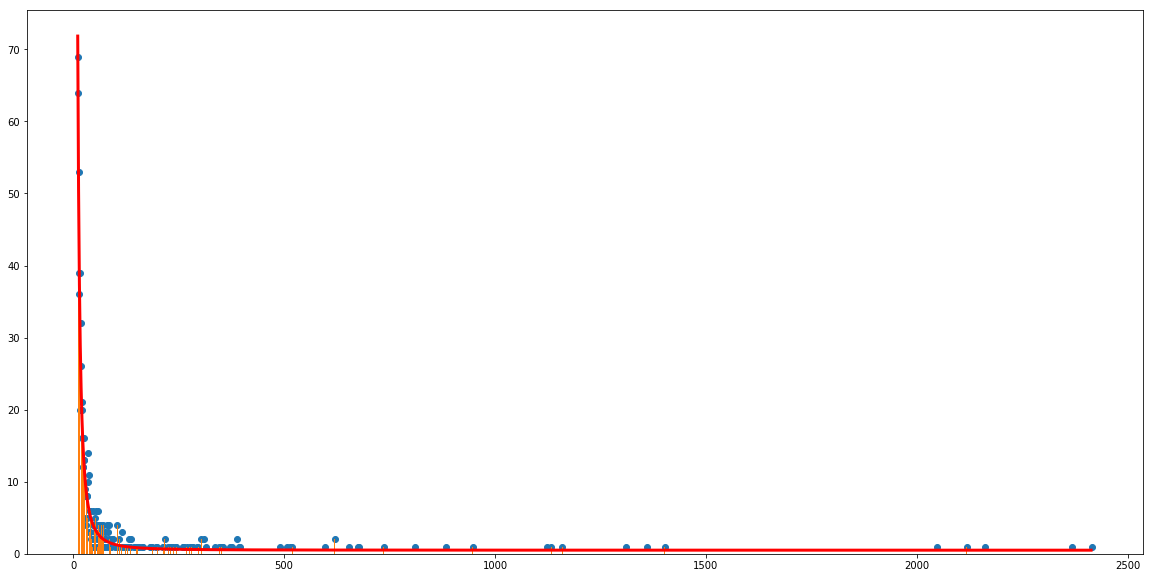

In [313]:
# Calculate the optimal fit of the function for unigrams
popt_unigram = Fof_approximation(arr1)

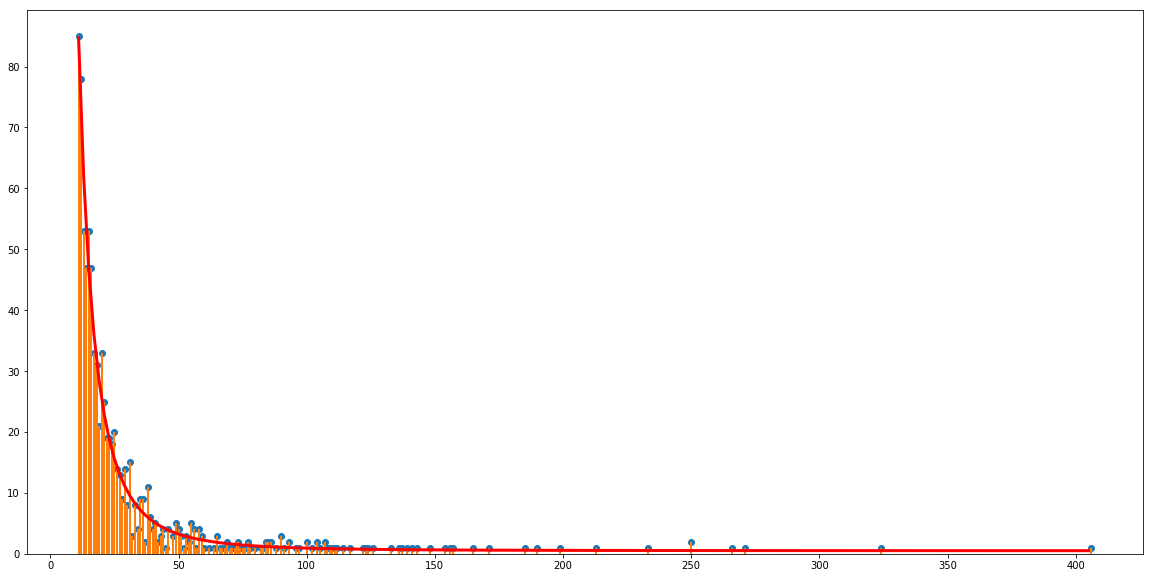

In [314]:
# Calculate the optimal fit of the function for bigrams
popt_bigram = Fof_approximation(arr2)

In [320]:
# An example of calling the GoodTuring for frequency 10, unigrams
print (GoodTuring(10, N1, popt_unigram))

8.724137931034484


### Estimation of d (discounting value)

In [321]:
d = []
for i in range(1,10):
    print (i-GoodTuring(i, N2, popt_bigram))
    d.append(i-GoodTuring(i, N2, popt_bigram))

0.7003073293390867
0.8471100062150405
1.091644204851752
1.0508474576271185
0.8735632183908049
0.8523676880222837
0.9696969696969697
0.8994974874371859
1.547770700636943


In [322]:
print (np.mean(d), np.std(d))

0.9814227846907984 0.22850297429538508


### Perplexity calculation

##### Functions

In [323]:
# The functions which calculates the perplexity of a sentence using add-1 if mode is 0 and using good turing if mode is 1.
def Perplexity(sentence, mode):
    sentence = sentence.split()
    p = 0
    if (mode == 1):
        for i in range(len(sentence)-1):
            p += math.log((GoodTuring(bigrams.get(' '.join(sentence[i:i+2]), 0), N2, popt_bigram))/GoodTuring(unigrams[sentence[i]], N1, popt_unigram))
    
    else:
        for i in range(len(sentence)-1):
            p += math.log(add1_smoothed_count(' '.join(sentence[i:i+2]))[0])
        
    return math.exp((-1*p)/(len(sentence)))

##### An example of how to call the Perplexity function

In [324]:
print (Perplexity('<s> it is my strong impression that i left this door shut just now </s>', 1))

35.86971061515742


#### Calculating the average perplexity values using Good Turing and Add-1 Smoothing over the test set.

In [236]:
GT = []
A1S = []
for i in test:
    GT.append(Perplexity(i, 1))
    A1S.append(Perplexity(i, 0))

In [237]:
print (np.mean(GT), np.mean(A1S))

152.11432702982037 1036236.7572074428
